# 11.9 Time dependent solution

In this notebook, the numerical computation of the Kolmogorov formula is presented at different time step.

The Kolmogorov formula is:
$$P(t) = P(0) \cdot \exp(t\,A)$$

In the following, the *system* depicted above is considered with:
- State 2: Normal operating state
- State 1: Degraded operating state
- State 0: Failure state

$\lambda_{i,j}$ is the transition rate from state $i$ to state $j$. Therefore $\lambda_{2,1}$ and $\lambda_{1,0}$ should be considered as degradation rates while $\lambda_{0,2}$ is a renewing rate. The initial state is the state 2.

![](./../images/Schema_11_09.png)

### Import

In [1]:
import numpy as np
from scipy.linalg import expm

%matplotlib notebook
import matplotlib.pyplot as plt

### Parameters

In [6]:
# Transition rates (1/h)
lambda_21 = 1e-3
lambda_10 = 1e-3
lambda_02 = 1e-2
# Time (h)
t_start = 0
t_end = 24*365*4
t_nstep = 10000 
# Initial state
state0 = 2

### Equation variables

In [7]:
# matrix A
A = np.array([
    [-lambda_02, 0, lambda_02],
    [lambda_10, -lambda_10, 0],
    [0, lambda_21, -lambda_21]])
# initial system state
P0 = np.zeros((3, ))
P0[state0] = 1
# time vector
t = np.linspace(t_start, t_end, t_nstep)

### Numerical computation

In [8]:
P = np.zeros((3, t_nstep))
for it in range(t_nstep):
    P[:, it] = P0@expm(t[it]*A)

### Illustration

<IPython.core.display.Javascript object>


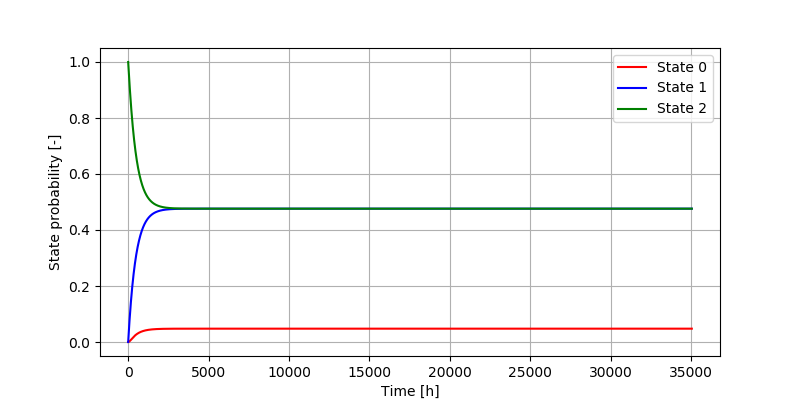

In [11]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1)
vColor = ['r', 'b', 'g']
for jd in range(3):
    ax.plot(t, P[jd, :], color=vColor[jd], label='State {:d}'.format(jd))
ax.set_xlabel('Time [h]')
ax.set_ylabel('State probability [-]')
ax.legend()
ax.grid(True)